# Clasificación con el Algoritmo K Nearest Neighbors
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos

**Algoritmo de clasificación**

**algoritmo de clasificación K Nearest Neighbors (K Vecinos más cercanos) dónde se estima la probabilidad de que un elemento pertenezca a una clase mediante el cálculo de la distancia euclídea a otros ejemplos cercanos en el espacio de los elementos**.

el algoritmo clasifica cada dato nuevo en el grupo que corresponda, según tenga k vecinos más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias.

* KNN también se puede utilizar para predicciones numéricas, aunque sin duda sigue siendo más habitual para **clasificación**.
* Puede ser utilizado para el **reconocimiento de patrones, extracción de datos y detección de intrusos**.
* Su uso es habitual para **sistemas de recomendación**.

1. Importar librerias.
2. Cargar Dataset + EDA / Visual EDA.
3. Missing values/Categorical values.
4. Dividir training(0.8)/test(0.2).
5. Escalar o normalizar algunos valores.
6. Crear modelo y entrenarlo.
7. Analizar resultados de la predicción.

## 1. Importanción de librerías y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler          # Para normalizar valores

# Necesarios para el modelo
from sklearn.model_selection import train_test_split    # Dividir los datos
from sklearn.neighbors import KNeighborsClassifier      # Para aplicar el modelo
from sklearn.metrics import classification_report       # Estos dos nos diran como de bien fue
from sklearn.metrics import confusion_matrix            ####

### *Ejercicio 1: Importación del dataset*

Carga en un dataframe el reviews_sentiment.csv y muestra las primeras 10 filas. ¿De qué trata este dataset? Utiliza funciones de EDA para entender su contenido y sus opciones.

In [2]:
df = pd.read_csv('reviews_sentiment.csv', delimiter=';')
df.head(10)
# wordcount -- contador de palabras

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


/home/a13adrianac/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/a13adrianac/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/a13adrianac/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/a13adrianac/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/a13adrianac/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has

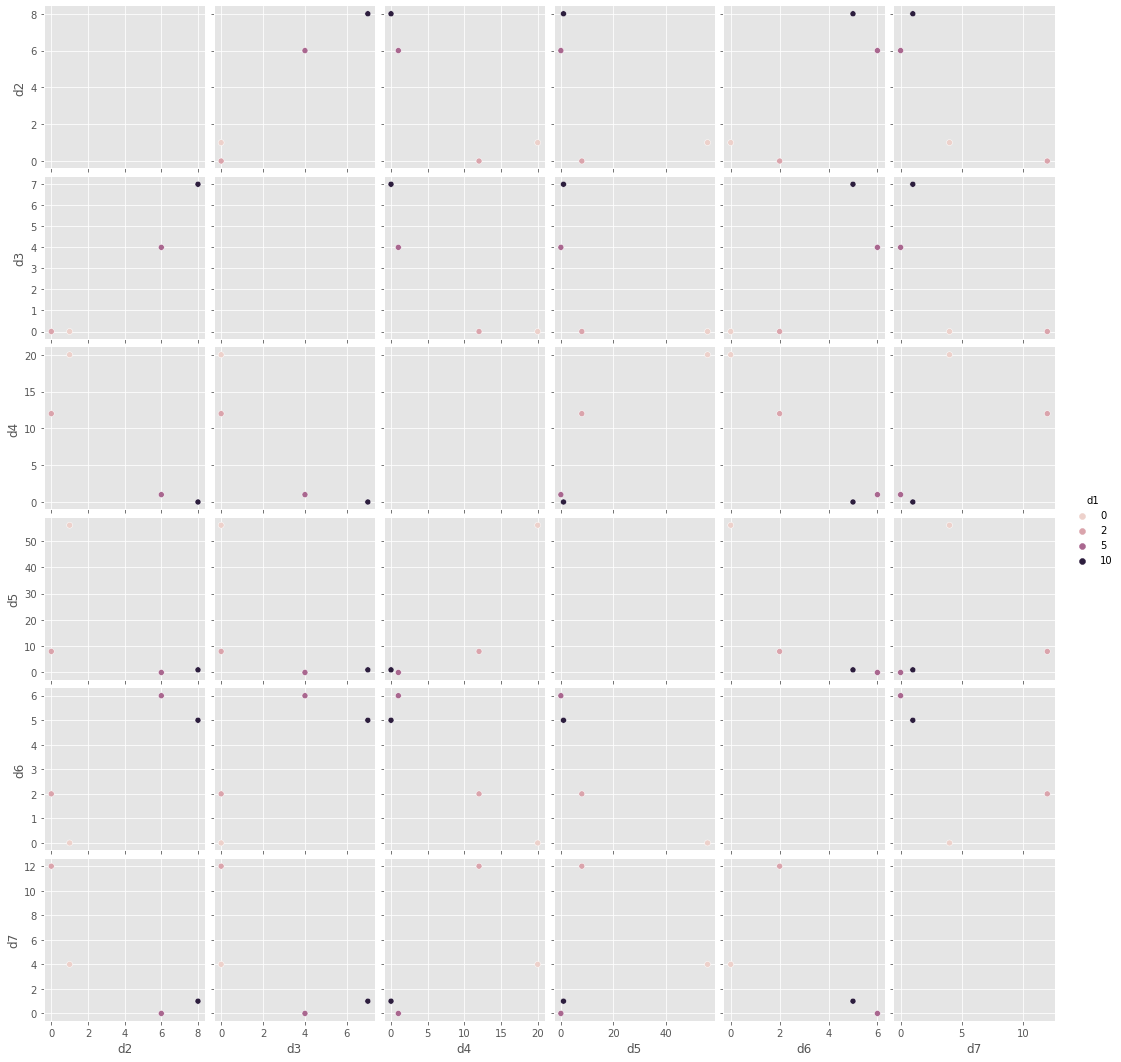

In [20]:
sb.pairplot(df, 'd1')

In [3]:
df.shape

(257, 7)

In [4]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


In [5]:
df['Star Rating'].value_counts()

5    88
3    78
1    37
4    30
2    24
Name: Star Rating, dtype: int64

<AxesSubplot:>

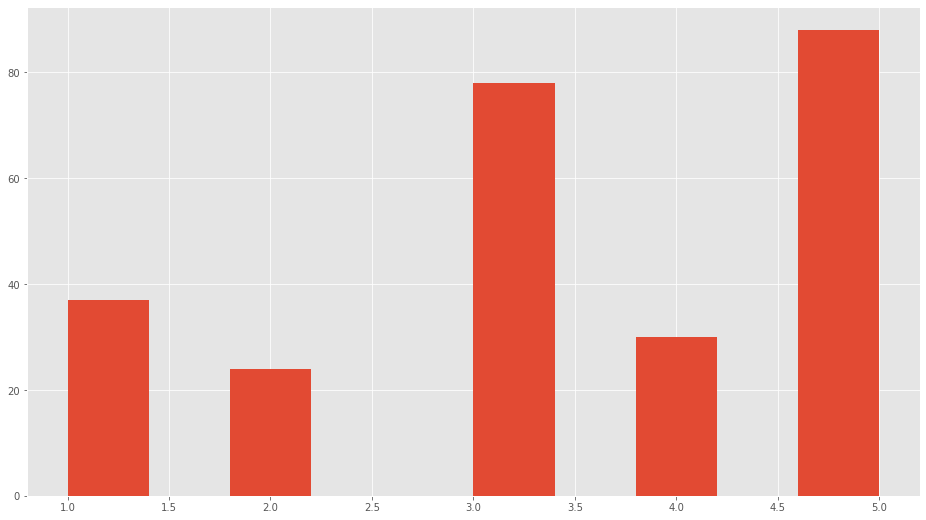

In [6]:
df['Star Rating'].hist()

Star Rating
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

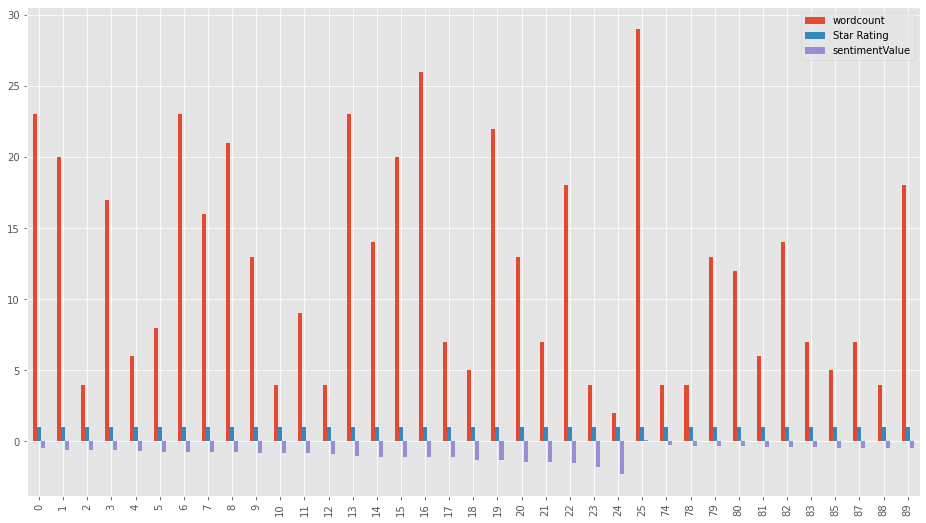

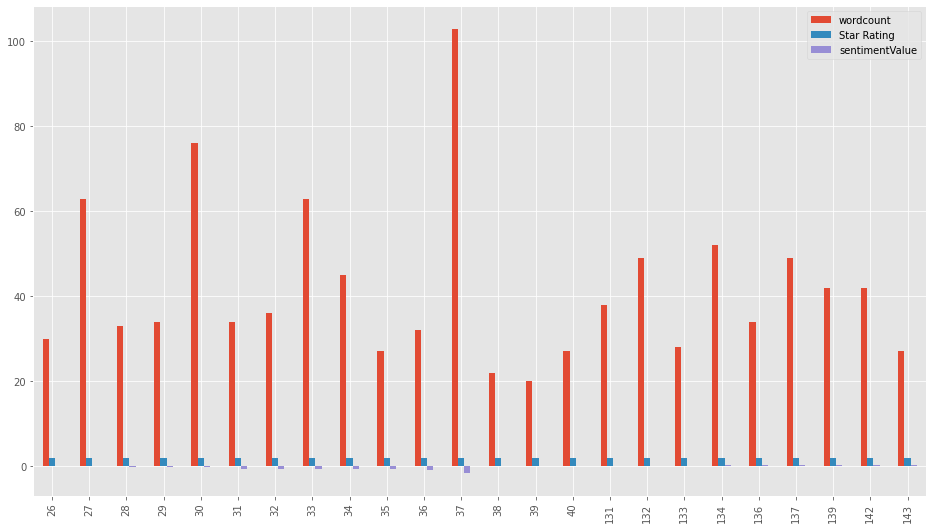

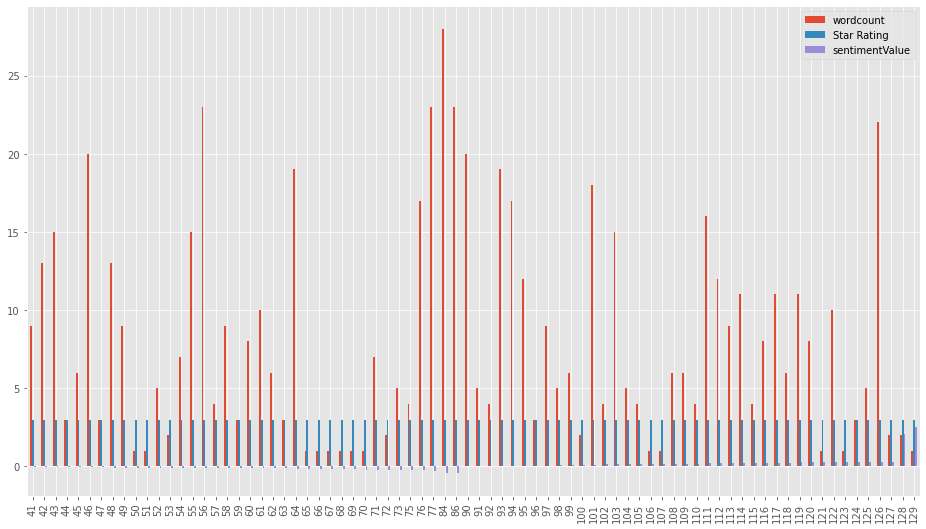

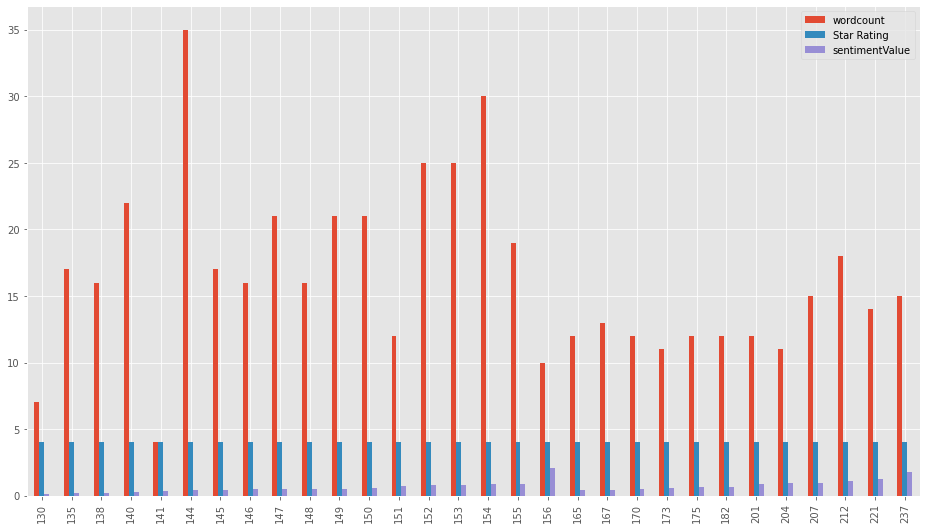

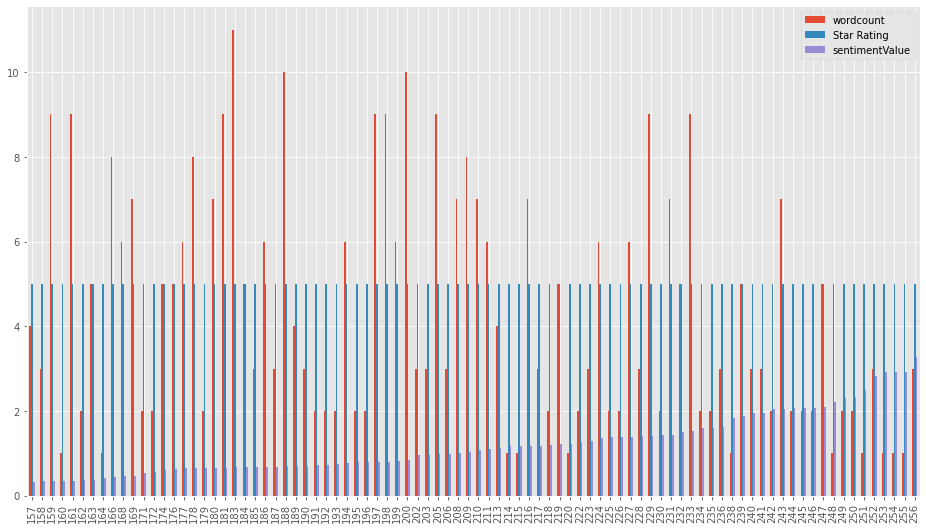

In [7]:
df.groupby('Star Rating').plot(kind='bar')

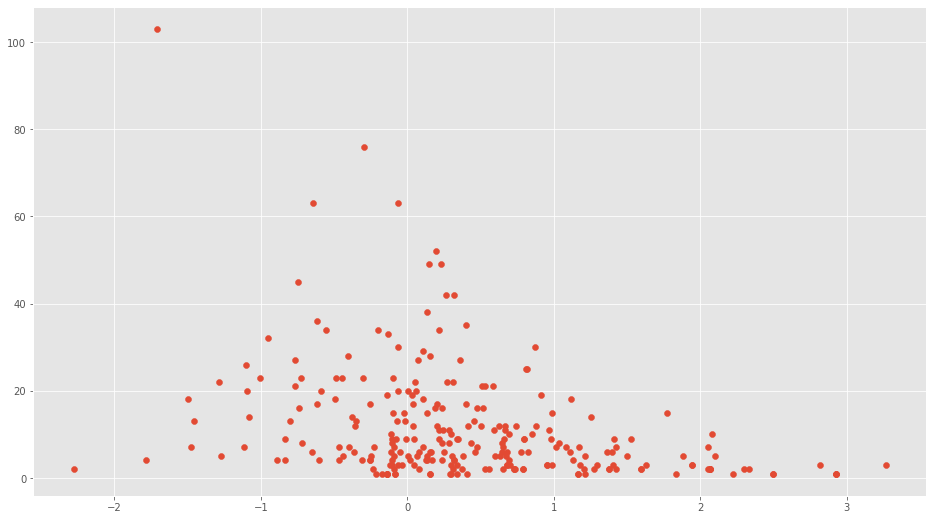

In [8]:
plt.scatter(df.sentimentValue, df.wordcount)

## 2. Preparación de los datos

In [9]:
X = df[['wordcount','sentimentValue']].values   # Matrices de valores con los valores de x
y = df['Star Rating'].values                    # Matriz de valores de la salida

#   Entrada
#       X_train: Valores de entrenamiento. Al introducirlos sabemos que tenemos y_train
#       X_test: Valores de testeo. Si todo va bien, al introducirlo debemos obtener y_test
#   Salida
#       y_train: Valores de entrenamiento
#       y_test: Valores de testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) # Dividimos el conjunto en 4
                                                                        # Si no decimos nada es 80:20. random_state indica como dividir los valores
scaler = MinMaxScaler() # Aplicamos una normalización para evitar que valores extremos alteren el resultado.
X_train = scaler.fit_transform(X_train) # fit_ implica que entrena y transforma
# El scaler ya se a entrenado
X_test = scaler.transform(X_test) # Solo hago la transformada porque ya hice el entrenamiento, que lo aprende de X_train
X_train

array([[0.01333333, 0.87899938],
       [0.82666667, 0.31422494],
       [0.06666667, 0.46798105],
       [0.12      , 0.83736148],
       [0.10666667, 0.70953467],
       [0.01333333, 0.83500824],
       [0.        , 0.66180509],
       [0.04      , 0.44162077],
       [0.33333333, 0.2253473 ],
       [0.02666667, 0.44585639],
       [0.04      , 0.38846587],
       [0.        , 0.46715517],
       [0.05333333, 0.55963124],
       [0.06666667, 0.31238771],
       [0.09333333, 0.48354771],
       [0.12      , 0.41637367],
       [0.02666667, 0.4949679 ],
       [0.05333333, 0.42063114],
       [0.        , 0.4108181 ],
       [0.38666667, 0.42567043],
       [0.01333333, 0.74406315],
       [0.38666667, 0.60516498],
       [0.06666667, 0.70605887],
       [0.34666667, 0.45189577],
       [0.29333333, 0.24491572],
       [0.21333333, 0.31921589],
       [0.        , 0.4669167 ],
       [0.01333333, 0.        ],
       [1.        , 0.38095133],
       [0.02666667, 0.70799147],
       [0.

## 3. Creación del modelo, entrenamiento y evaluación

In [10]:
n_neighbors = 7     # Calcula para 7 vecinos, hay que encontrar el valor optimo. Mas abajo tenemos un for que lo calcula

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)      # Entreno con la entrada de entrenamiento (X_train) y con la salida de entrenamiento (y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set:     {:.2f}'
      .format(knn.score(X_test, y_test)))
# Cuanto mas se acerque los valores a 1 mejor sera.

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set:     0.86


## 4. Predicción o inferencia

In [11]:
pred = knn.predict(X_test)      # Realizamos la predicción. Con la entrada X_test obtenemos la salida pred.

## 5. Métricas y matriz de confusión

In [12]:
print(confusion_matrix(y_test, pred)) # Nos da un tabla con los valores del test y de la prediccion
# Nos interesa la diagonal de arriba-derecha a abajo-izquierda, porque seria los valores que fueron bien
# los que estan fuera de la diagonal son los valores erroneos y hay que tener cuidado con ellos
# La matriz sera los valores predictivos contra los valores reales
#                Valores predictivos (pred)
#   Valores
#   Reales
#   (y_test)
print(classification_report(y_test, pred))
# precision: columnas. Cuantos he clasificado incorrectamente y correctamente. Identifica la frecuencia con la que un modelo fue correcto al predecir la clase positiva.
#       Precision = (True positives)/(True positives + False positives)

# recall: filas. Cuantos he clasificado incorrectamente y correctamente. De todas las posibles etiquetas positivas, ¿Cuantas identificó correctamente el modelo?.
#   recall = (True positives)/(True positives + False negatives)

# f1-score: media armonica entre precision y recall. El de media mas baja es el de peor predicción.

# support: número de valores de cada uno

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



## 6. Representación gráficá de los resultados

<ipython-input-13-fa5c79ce998e>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


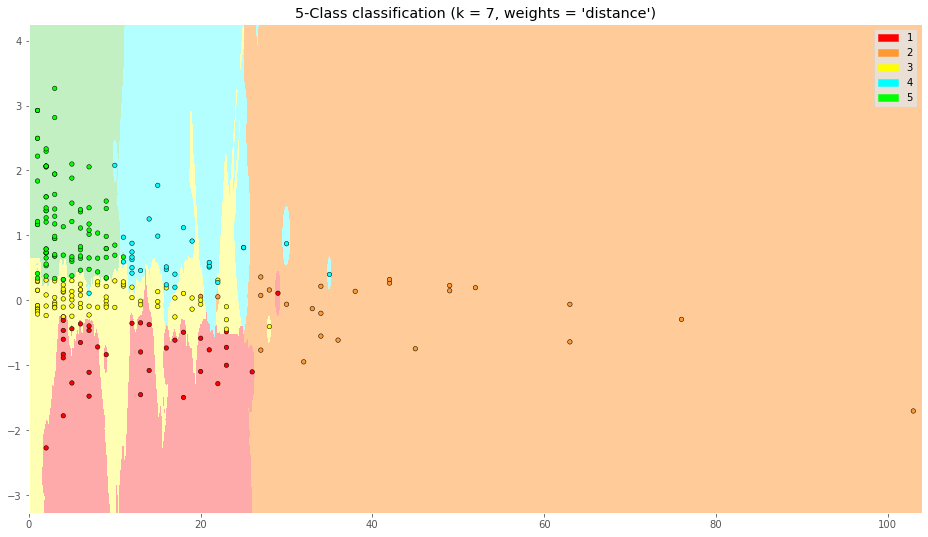

In [13]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])


plt.title("5-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'distance'))

plt.show()


In [14]:
# las manchas en otros colores serian los errores

## 7. Cálculo del mejor K

([<matplotlib.axis.XTick at 0x7f183c10fdf0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

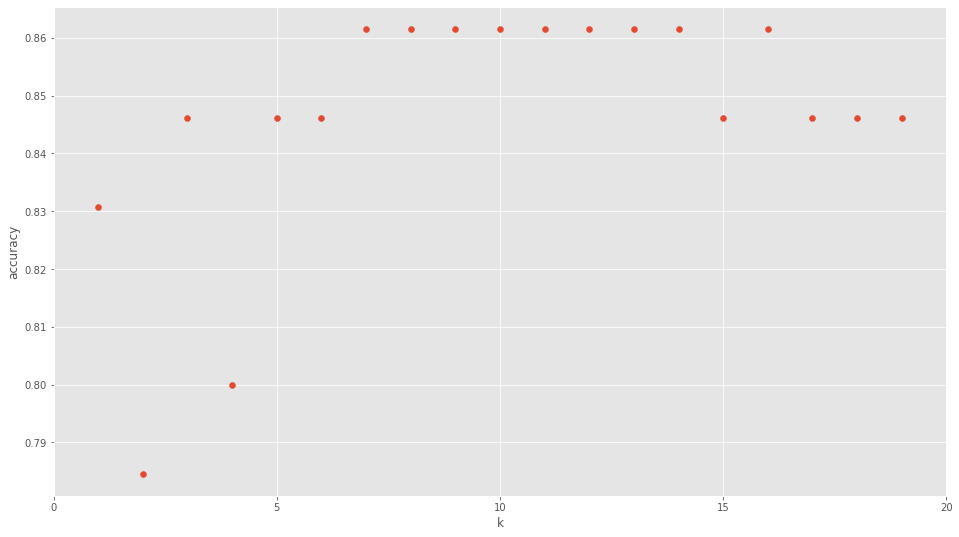

In [15]:
k_range = range(1, 20)
scores = []
for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## 8. Cálculo de nuevas predicciones

In [16]:
print(clf.predict([[5, 1.0]]))

[5]


In [17]:
print(clf.predict_proba([[20, 0.0]])) # Nos da la probabilidad de que sea de cada tipo

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]
